__лабораторная работа N1:__  базовые методы машинного обучения

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждой задачи (классификация, регрессия, кластеризация)      
    получить/сгенерировать данные и применить к ним соответствующий задаче метод,   
    к результатам модели применить методы оценки  

In [319]:
import numpy as np
import matplotlib.pyplot as plt

## классификация

### данные

In [320]:
# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data

from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

from sklearn.datasets import load_iris

# make_blobs?

In [321]:
# X,y = make_blobs(centers=2,)
# plt.scatter(X[:,0],X[:,1],c=y)

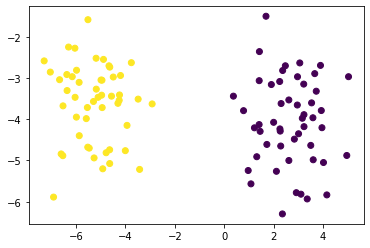

In [322]:
#X,y = make_blobs(centers=2,)
X,y = make_blobs(centers=2)
plt.scatter(X[:,0], X[:,1], c=y)

### обработка данных

In [323]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures



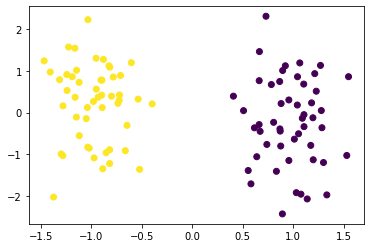

In [324]:
standard = StandardScaler()
standardX = standard.fit_transform(X)
plt.scatter(standardX[:,0], standardX[:,1], c=y)

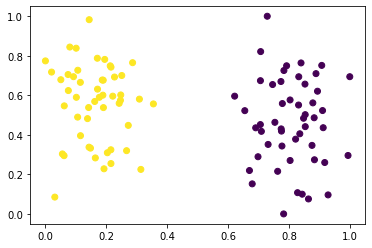

In [325]:
minmax = MinMaxScaler()
minmaxX = minmax.fit_transform(X)
plt.scatter(minmaxX[:,0], minmaxX[:,1], c=y)

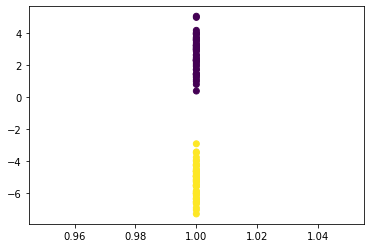

In [326]:
polynomial = PolynomialFeatures()
polynomialX = polynomial.fit_transform(X)
plt.scatter(polynomialX[:,0], polynomialX[:,1], c=y)

### метрический  подход

In [327]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier?

In [328]:
kn = KNeighborsClassifier()
kn.fit(minmaxX, y)

KNeighborsClassifier()

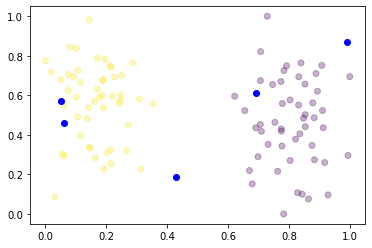

In [329]:
randDots = np.random.rand(5, 2)

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.3, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c='b')

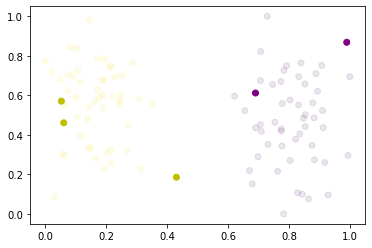

In [330]:
knPred = kn.predict(randDots)
c = [['purple','y'][i] for i in knPred]

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.1, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c=c)

### статистический подход

In [331]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB?

In [332]:
gaus = GaussianNB()
gaus.fit(minmaxX, y)

GaussianNB()

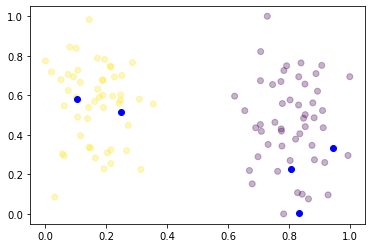

In [333]:
randDots = np.random.rand(5, 2)

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.3, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c='b')

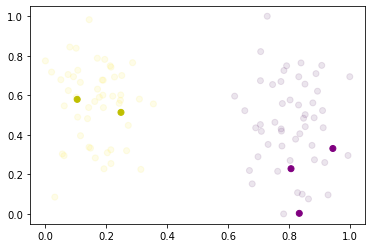

In [334]:
gausPred = gaus.predict(randDots)
c = [['purple','y'][i] for i in gausPred]

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.1, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c=c)

### логический подход

In [335]:
from sklearn.tree import DecisionTreeClassifier

#  DecisionTreeClassifier?

In [336]:
tree = DecisionTreeClassifier()
tree.fit(minmaxX, y)

DecisionTreeClassifier()

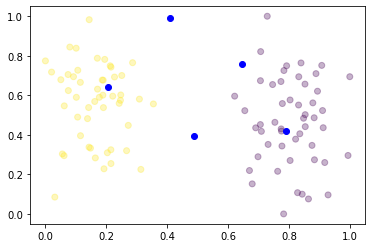

In [337]:
randDots = np.random.rand(5, 2)

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.3, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c='b')

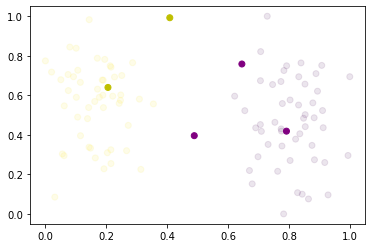

In [338]:
treePred = tree.predict(randDots)
c = [['purple','y'][i] for i in treePred]

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.1, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c=c)

### линейный подход

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
# SVC?

In [340]:
clf = make_pipeline(MinMaxScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC(gamma='auto'))])

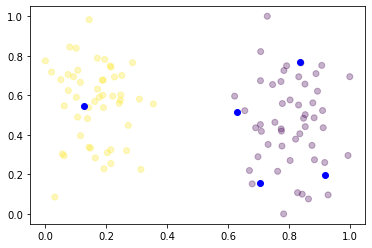

In [341]:
randDots = np.random.rand(5, 2)

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.3, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c='b')

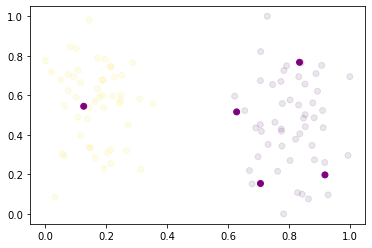

In [342]:
clfPred = clf.predict(randDots)
c = [['purple','y'][i] for i in clfPred]

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.1, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c=c)

### композиции

In [343]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# AdaBoostClassifier?

In [344]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(minmaxX, y)

AdaBoostClassifier(n_estimators=100, random_state=0)

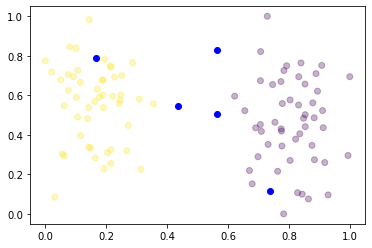

In [350]:
randDots = np.random.rand(5, 2)

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.3, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c='b')

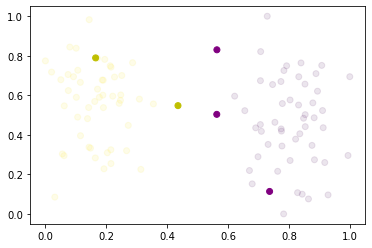

In [351]:
adaPred = ada.predict(randDots)
c = [['purple','y'][i] for i in adaPred]

plt.figure()
plt.scatter(minmaxX[:,0], minmaxX[:,1], alpha=0.1, c=y)
plt.scatter(randDots[:,0], randDots[:,1], c=c)

### оценка классификатора

In [152]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

In [349]:
testDots = [[0.18118605, 0.89016624], [0.06699234, 0.74050903],
 [0.2940598,  0.06501854], [0.90737496, 0.92258017], [0.98718558, 0.12348979], [0.04624506, 0.76032026],
 [0.03594344, 0.9606332 ], [0.0886772,  0.81441964], [0.0722731,  0.55783762], [0.03240062, 0.6434532 ],
 [0.25287388, 0.33996732], [0.28532554, 0.87439349], [0.33196085, 0.26589397], [0.59579256, 0.15240088],
 [0.37889858, 0.7818118 ], [0.4744411,  0.73031513], [0.83087205, 0.32509409], [0.90710701, 0.85899533],
 [0.14929378, 0.04853378], [0.67035486, 0.47476619], [0.64588421, 0.9042151 ], [0.85120408, 0.58029187],
 [0.37372792, 0.82639905], [0.57901337, 0.84572317], [0.55589511, 0.45723929], [0.90130885, 0.89083673],
 [0.22618065, 0.39503839], [0.75225447, 0.23732329], [0.00535037, 0.03486213], [0.32755962, 0.85780831],
 [0.61858423, 0.7616055 ], [0.50050035, 0.35415818], [0.62444075, 0.35855071], [0.56037087, 0.66626359],
 [0.12807149, 0.12954863], [0.55308257, 0.51974492], [0.26242806, 0.65987609], [0.41624917, 0.99404792],
 [0.27673496, 0.40241266], [0.69532786, 0.08351045], [0.73020488, 0.15991433], [0.9388339,  0.33011309],
 [0.22061302, 0.13635969], [0.43147346, 0.32074543], [0.54183518, 0.63557561], [0.9032929,  0.90146799],
 [0.86282815, 0.883181  ], [0.5863999,  0.51860293], [0.4688435,  0.69183919], [0.83030103, 0.72788873]]

testPred = [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
            0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0 ,1, 0]

In [357]:
knPred = kn.predict(testDots)
gausPred = gaus.predict(testDots)
treePred = tree.predict(testDots)
svcPred = clf.predict(testDots)
adaPred = ada.predict(testDots)

In [363]:
def print_metrics(func):
    print('KN')
    print(func(testPred, knPred))
    print('Gauss')
    print(func(testPred, gausPred))
    print('Tree')
    print(func(testPred, treePred))
    print('SVC')
    print(func(testPred, svcPred))
    print('ADA')
    print(func(testPred, adaPred))

In [364]:
print_metrics(confusion_matrix)

KN
[[25  0]
 [ 0 25]]
Gauss
[[25  0]
 [ 0 25]]
Tree
[[25  0]
 [ 0 25]]
SVC
[[25  0]
 [25  0]]
ADA
[[25  0]
 [ 0 25]]


In [359]:
print_metrics(classification_report)

KN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Gauss
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

SVC
 

D:\Progs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [360]:
print_metrics(accuracy_score)

KN
1.0
Gauss
1.0
Tree
1.0
SVC
0.5
ADA
1.0


In [361]:
print_metrics(auc)

KN


ValueError: x is neither increasing nor decreasing : [1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 1 1 0 0 0 1 1 0 0 0 0 1 0].

## регрессия

### данные

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

### обработка данных

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### модели регресии

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

### оценка регрессии

In [ ]:
from sklearn.metrics import mean_squared_error

## кластеризация

### данные

In [ ]:
from sklearn.datasets import make_blobs

### модели кластеризаторов

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

### оценка кластеризации

In [ ]:
from sklearn.metrics import silhouette_score